<a href="https://colab.research.google.com/github/Jihen-Belhoudi/GMC-Workshop/blob/main/Workshop_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
breast_data = pd.read_csv('/content/data.csv')

breast_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:

breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
breast_data.drop(columns=['id','Unnamed: 32'], axis=1,inplace=True)

In [ ]:
feature_summary = breast_data.drop('diagnosis',axis=1).describe()
feature_summary

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
missing_values = breast_data.isnull().sum()
print("Missing Values:\n",missing_values)

Missing Values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
duplicate_rows = breast_data.duplicated()
print("Number of duplicated rows",duplicate_rows.sum())

Number of duplicated rows 0


In [ ]:
diagnosis_distrubtion = breast_data['diagnosis'].value_counts().reset_index()
diagnosis_distrubtion.columns = ['Diagnosis','Count']

colors = {'M':'darkred',
          'B':'steelblue'}

fig = px.bar(diagnosis_distrubtion,x='Diagnosis',y='Count', color='Diagnosis',
            color_discrete_map = colors,title='Distribution of Malignant (M) and Benign (B) Diagnoses')
fig.show()

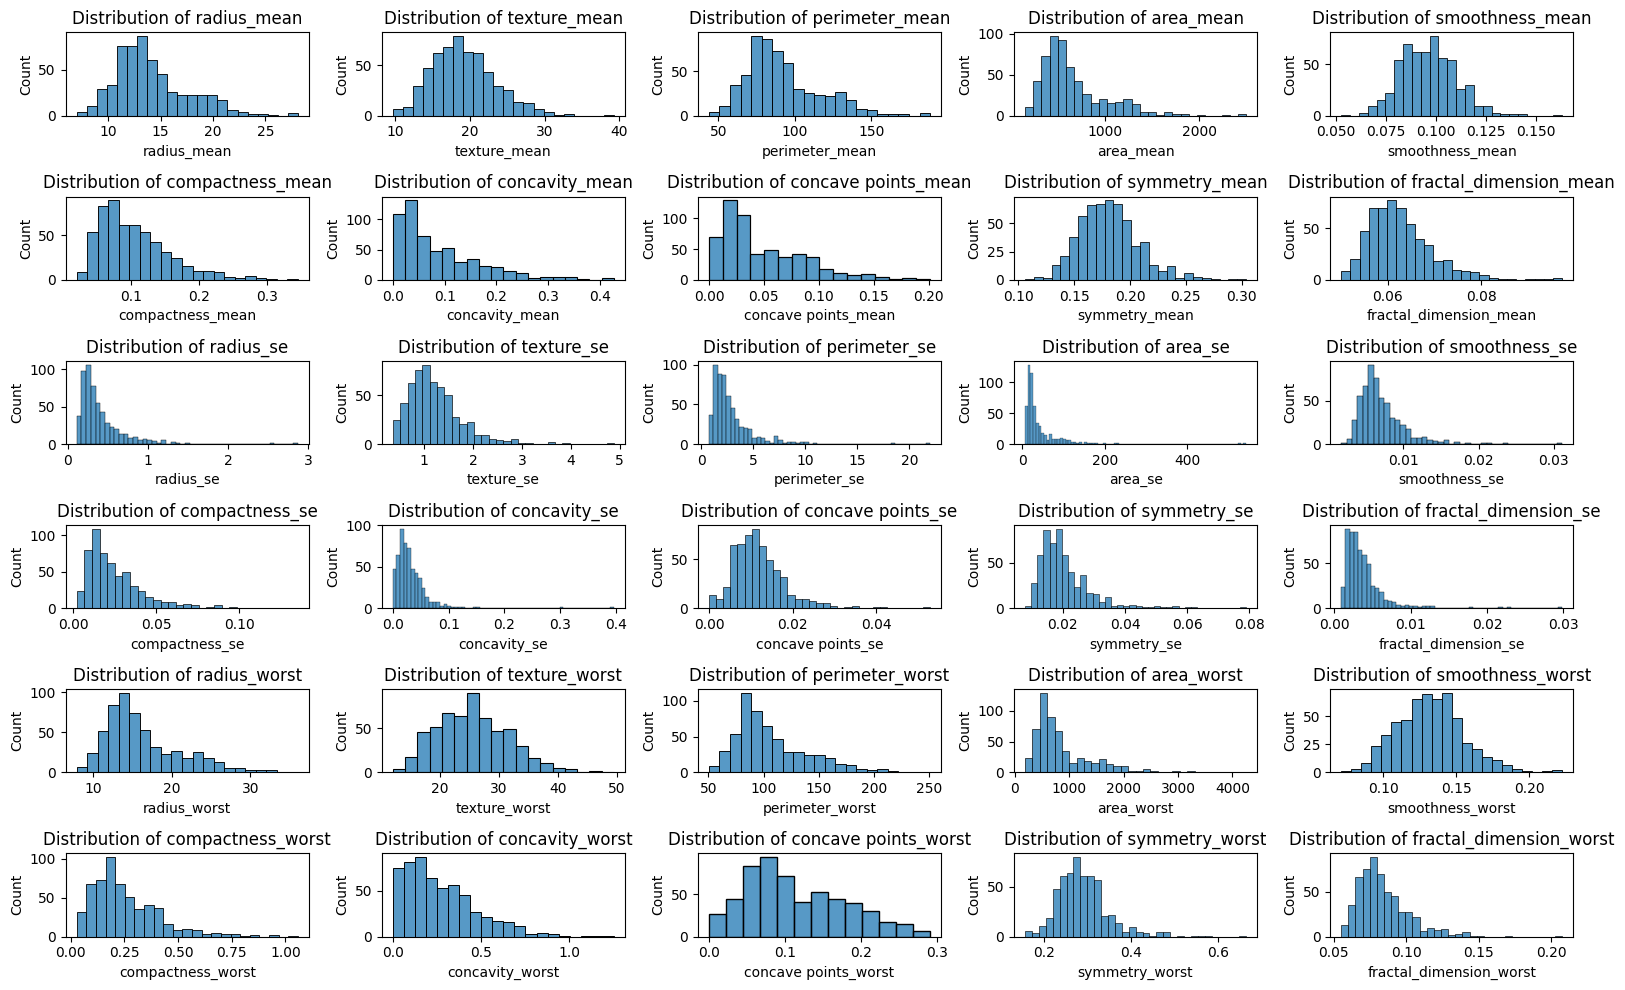

In [ ]:
num_features = breast_data.drop('diagnosis',axis=1)

plt.figure(figsize=(16,10))
for i, feature in enumerate(num_features.columns,1):
  plt.subplot(6,5,i)
  sns.histplot(num_features[feature])
  plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
breast_data['diagnosis'] = breast_data['diagnosis'].map({'M':1, 'B':0})

In [ ]:
correlation_matrix = breast_data.corr()

target_correlation = correlation_matrix['diagnosis'].sort_values(ascending=False)
fig_corr = px.bar(x=target_correlation.index,y=target_correlation.values,
                  title= 'Correlation of Features with Diagnosis(Target Variable)')
fig_corr.show()

In [ ]:
selected_features = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst',
                      'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'compactness_mean']
selected_features.append('diagnosis')
selected_df = breast_data[selected_features]

In [ ]:
X = selected_df.drop('diagnosis',axis=1)
y=selected_df['diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [ ]:
models = {
          'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random_Forest' : RandomForestClassifier(),
          'Support Vector Machine': SVC()

}

In [ ]:
results = {}
for model_name,model in models.items():
   model.fit(X_train,y_train)
   y_pred_train = model.predict(X_train)
   y_pred_test = model.predict(X_test)

   acc_train = accuracy_score(y_train,y_pred_train)
   acc_test = accuracy_score(y_test,y_pred_test)

   results[model_name] = {
       'Accuracy train':  acc_train,
       'Accuracy test':  acc_test,
       'Confusion Matrix': confusion_matrix(y_test,y_pred_test),
       'Classification Report': classification_report(y_test,y_pred_test),

   }

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression
Accuracy Train: 0.9560439560439561
Accuracy Test: 0.9035087719298246


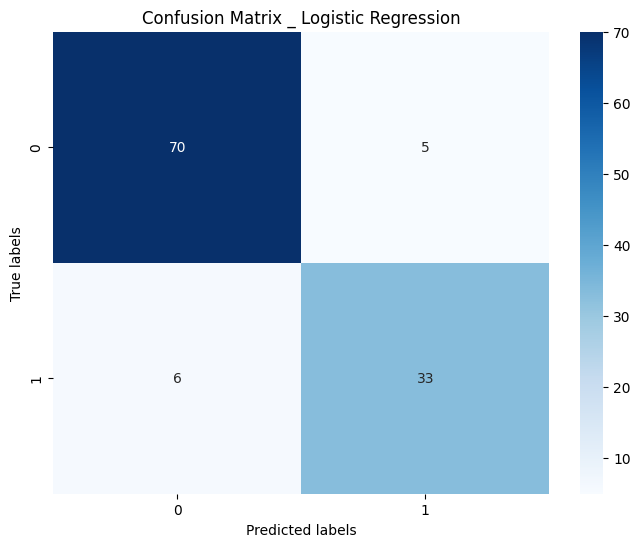

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        75
           1       0.87      0.85      0.86        39

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114

KNN
Accuracy Train: 0.9472527472527472
Accuracy Test: 0.9035087719298246


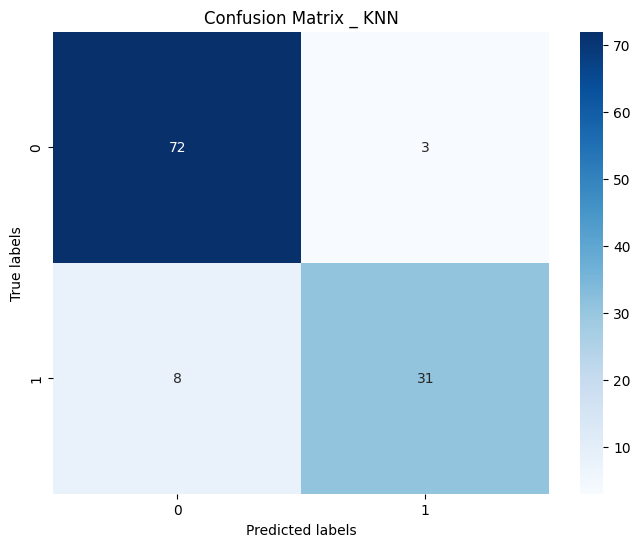

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        75
           1       0.91      0.79      0.85        39

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114

Decision Tree
Accuracy Train: 1.0
Accuracy Test: 0.9298245614035088


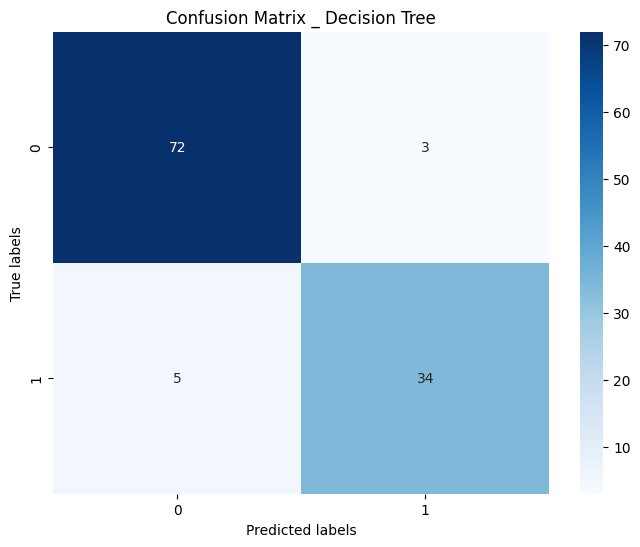

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.92      0.87      0.89        39

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Random_Forest
Accuracy Train: 1.0
Accuracy Test: 0.9298245614035088


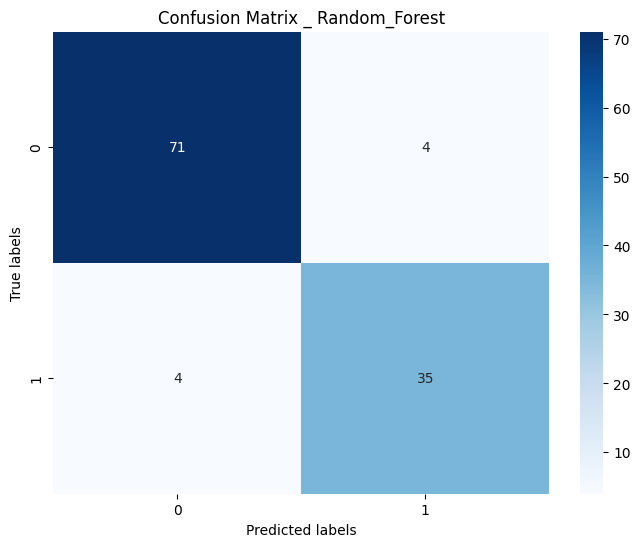

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.90      0.90      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Support Vector Machine
Accuracy Train: 0.9340659340659341
Accuracy Test: 0.868421052631579


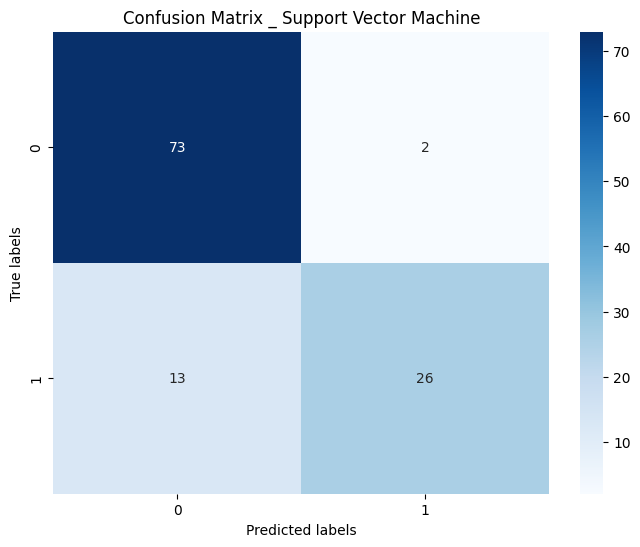

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        75
           1       0.93      0.67      0.78        39

    accuracy                           0.87       114
   macro avg       0.89      0.82      0.84       114
weighted avg       0.88      0.87      0.86       114



In [ ]:
for model_name,metrics in results.items():
  print(f'{model_name}')
  print(f"Accuracy Train: {metrics['Accuracy train']}")
  print(f"Accuracy Test: {metrics['Accuracy test']}")
  #confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(metrics['Confusion Matrix'], annot=True, cmap='Blues')
  plt.title(f'Confusion Matrix _ {model_name}')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()

  #classification report
  print("Classification Report:")
  print(metrics['Classification Report'])


In [ ]:
params = {'C': [0.00001,0.001,0.01,0.1,1,10,100,1000],
           'gamma':[0.0000001,0.0001,0.001,0.01,0.1,1,10]}

SVM = SVC(kernel='rbf')

grid_search = GridSearchCV(SVM,params,cv=10)
grid_search.fit(X_train,y_train)

best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_



In [ ]:
print("Best Estimator:", best_estimator )
print("Best score:", best_score )

Best Estimator: SVC(C=10, gamma=0.0001)
Best score: 0.9448792270531401


In [ ]:
svm = SVC(kernel='rbf',C=10, gamma=0.0001)
svm.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train,y_pred_train )
acc_test = accuracy_score(y_test,y_pred_test )

print('acc train',acc_train)
print('acc test',acc_test)

acc train 0.9340659340659341
acc test 0.868421052631579
